# Titanic - Machine Learning from Disaster

# Exploratory data analysis (EDA)

In [2]:
import pandas as pd
import numpy as np

#loading data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
# check for missing data
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [8]:
# Fill missing values in the 'Age' column with the median age
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

# Fill missing 'Embarked' with mode
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Fill missing 'Fare' in test dataset with median
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# P.S. Column Cabin will be removed

# Distribution of survivors and dead by gender

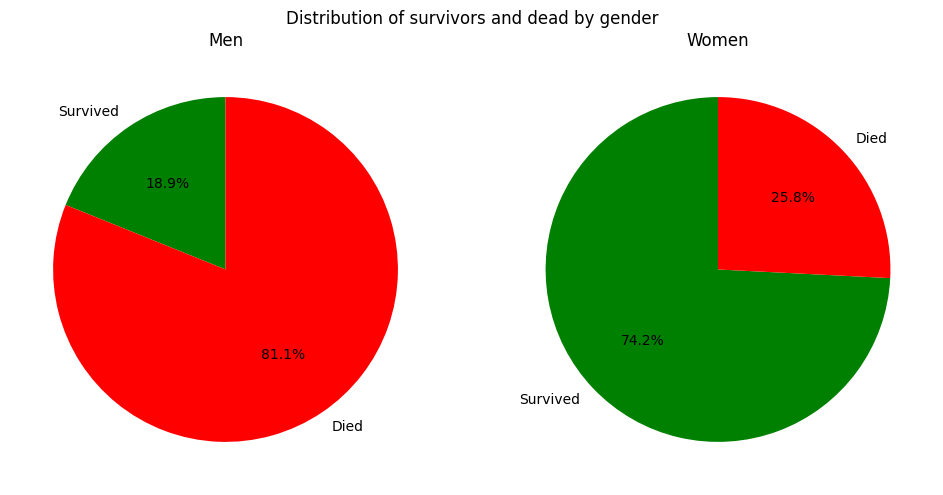

In [15]:
import matplotlib.pyplot as plt

males_total = len(train_df.loc[(train_df['Sex'] == 'male')])
females_total = len(train_df.loc[(train_df['Sex'] == 'female')])
males_survived = len(train_df.loc[((train_df['Sex'] == 'male') & (train_df['Survived'] == 1))])
females_survived = len(train_df.loc[((train_df['Sex'] == 'female') & (train_df['Survived'] == 1))])


survivors_counts = {
    'Survived': [males_survived, females_survived],
    'Died': [males_total-males_survived, females_total-females_survived]
}

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Men
axs[0].pie([males_survived, males_total - males_survived], labels=['Survived', 'Died'], autopct='%1.1f%%', startangle=90, colors=['g', 'r'])
axs[0].set_title('Men')

# Women
axs[1].pie([females_survived, females_total - females_survived], labels=['Survived', 'Died'], autopct='%1.1f%%', startangle=90, colors=['g', 'r'])
axs[1].set_title('Women')

plt.suptitle('Distribution of survivors and dead by gender')
plt.tight_layout()
plt.show()


In [25]:
print("Survival probabilities by passenger sex:\n")
print(
    f"Men: {males_survived / males_total:.3f}\n"
    f"Women: {females_survived / females_total:.3f}"
)


Survival probabilities by passenger sex:

Men: 0.189
Women: 0.742


In [20]:
from sklearn.preprocessing import LabelEncoder

# convert text values ​​to numeric values
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = label_encoder.fit_transform(test_df['Sex'])

train_df['Sex'].head()

,Sex
0,1
1,0
2,0
3,0
4,1


# Distribution of survivors and fatalities by cabin class

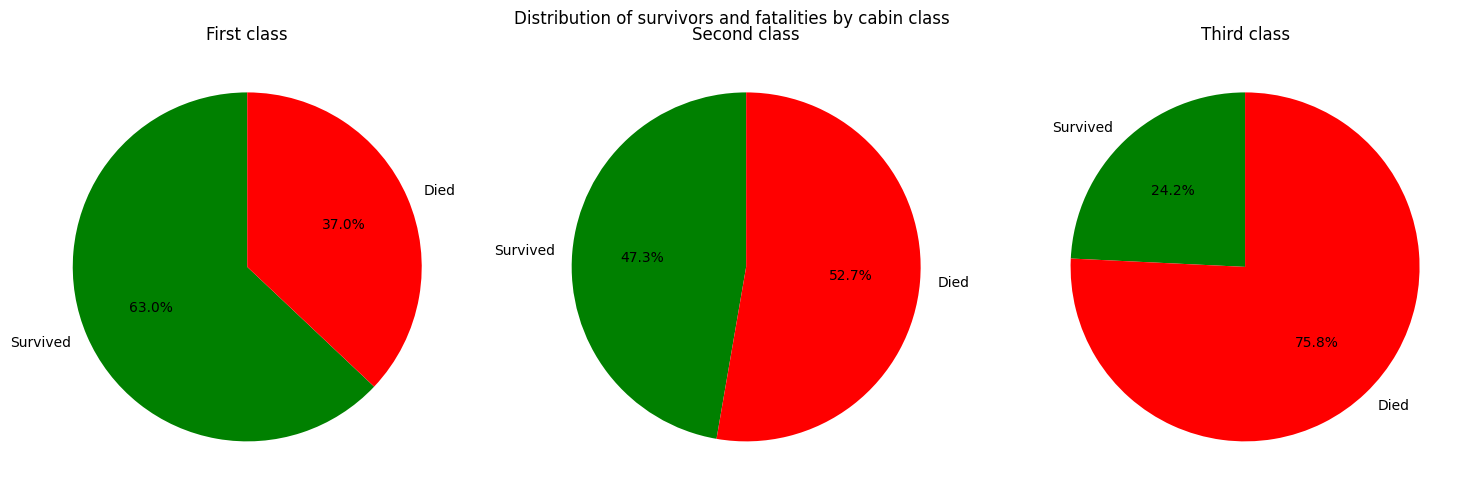

In [22]:
first_total = len(train_df.loc[(train_df['Pclass'] == 1)])
second_total = len(train_df.loc[(train_df['Pclass'] == 2)])
third_total = len(train_df.loc[(train_df['Pclass'] == 3)])
first_survived = len(train_df.loc[((train_df['Pclass'] == 1) & (train_df['Survived'] == 1))])
second_survived = len(train_df.loc[((train_df['Pclass'] == 2) & (train_df['Survived'] == 1))])
third_survived = len(train_df.loc[((train_df['Pclass'] == 3) & (train_df['Survived'] == 1))])

data = {
    'First class': [first_survived, first_total - first_survived],
    'Second class': [second_survived, second_total - second_survived],
    'Third class': [third_survived, third_total - third_survived]
}

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (class_name, values) in enumerate(data.items()):
    axs[i].pie(
        values,
        labels=['Survived', 'Died'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['g', 'r']
    )
    axs[i].set_title(class_name)

plt.suptitle('Distribution of survivors and fatalities by cabin class')
plt.tight_layout()
plt.show()


In [23]:
print("Survival probabilities by passenger class:\n")
print(
    f"1st Class: {first_survived / first_total:.2f}\n"
    f"2nd Class: {second_survived / second_total:.2f}\n"
    f"3rd Class: {third_survived / third_total:.2f}"
)


Survival probabilities by passenger class:

1st Class: 0.63
2nd Class: 0.47
3rd Class: 0.24


# Distribution of passengers by age

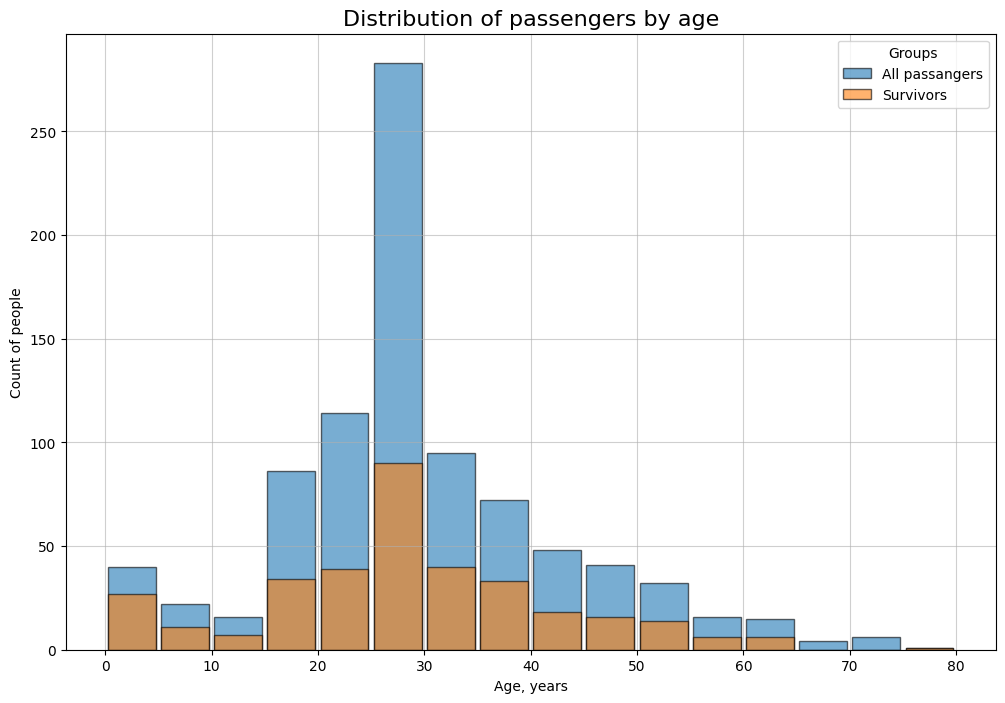

In [27]:
import matplotlib.pyplot as plt

all_passengers = train_df.loc[train_df['Age'].notna()]
survivors = train_df.loc[(train_df['Survived'] == 1) & (train_df['Age'].notna())]
male_survivors = train_df.loc[(train_df['Sex'] == 'male') & (train_df['Survived'] == 1) & (train_df['Age'].notna())]
female_survivors = train_df.loc[(train_df['Sex'] == 'female') & (train_df['Survived'] == 1) & (train_df['Age'].notna())]


groups = {
    'All passangers': all_passengers['Age'],
    'Survivors': survivors['Age'],
}


plt.figure(figsize=(12, 8))
bins = range(0, int(train_df['Age'].max()) + 1, 5)  # Age intervals in 5-year increments

for label, ages in groups.items():
    plt.hist(ages, bins=bins, alpha=0.6, label=label, edgecolor='black', rwidth=0.9)

plt.title('Distribution of passengers by age', fontsize=16)
plt.xlabel('Age, years')
plt.ylabel('Count of people')
plt.legend(title='Groups')
plt.grid(True, alpha=0.6)

plt.show()



# Distribution of survivors and dead by family size

In [29]:
# Create 'Family' feature
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
test_df['Family'] = test_df['SibSp'] + test_df['Parch']

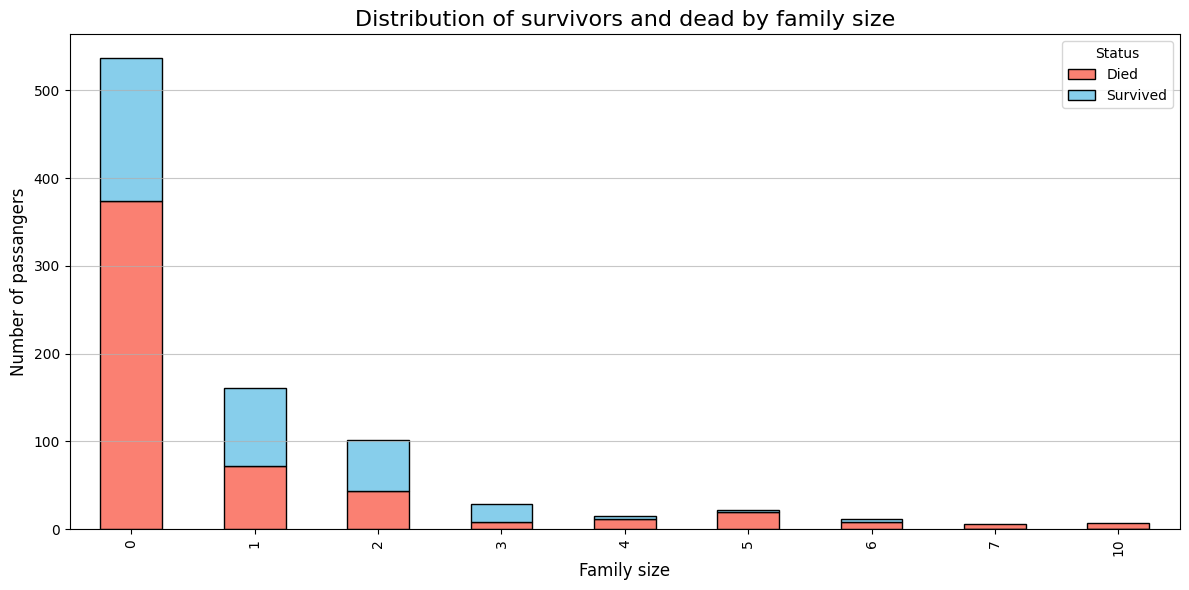

In [31]:
family_counts = train_df.groupby(['Family', 'Survived']).size().unstack(fill_value=0)

family_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Distribution of survivors and dead by family size', fontsize=16)
plt.xlabel('Family size', fontsize=12)
plt.ylabel('Number of passangers', fontsize=12)
plt.legend(['Died', 'Survived'], title='Status', fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


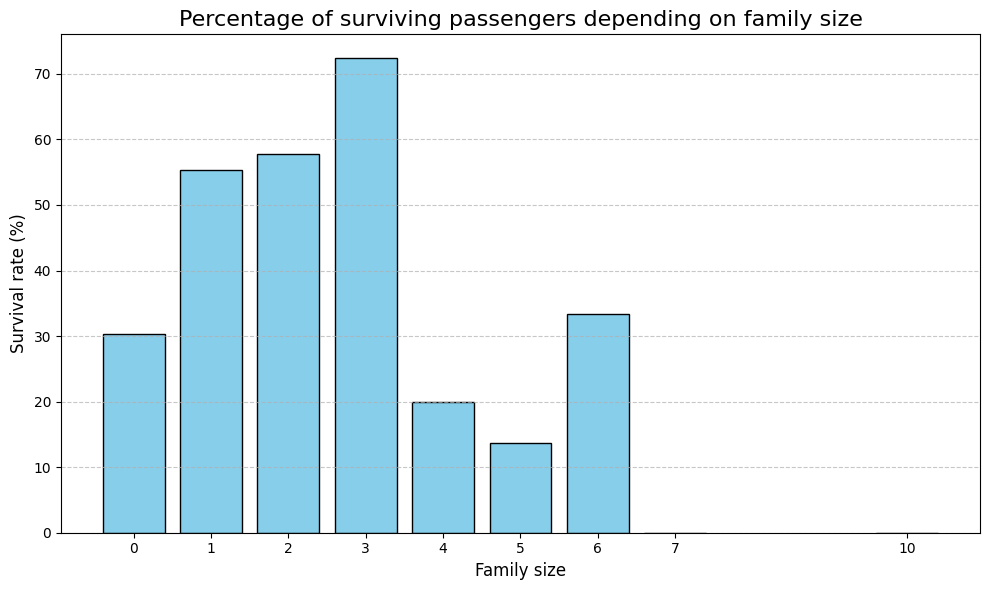

In [32]:
family_grouped = train_df.groupby('Family')['Survived'].agg(['count', 'sum']).reset_index()
family_grouped['Survival Rate (%)'] = (family_grouped['sum'] / family_grouped['count']) * 100


plt.figure(figsize=(10, 6))
plt.bar(family_grouped['Family'], family_grouped['Survival Rate (%)'], color='skyblue', edgecolor='black')
plt.title('Percentage of surviving passengers depending on family size', fontsize=16)
plt.xlabel('Family size', fontsize=12)
plt.ylabel('Survival rate (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(family_grouped['Family'])
plt.tight_layout()
plt.show()

In [33]:
# Create 'IsAlone' feature
train_df['IsAlone'] = (train_df['Family'] == 0). astype(int)
test_df['IsAlone'] = (test_df['Family'] == 0).astype(int)

In [34]:
# Encode 'Embarked' column
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])
test_df['Embarked'] = label_encoder.fit_transform(test_df['Embarked'])

# Correlation Matrix

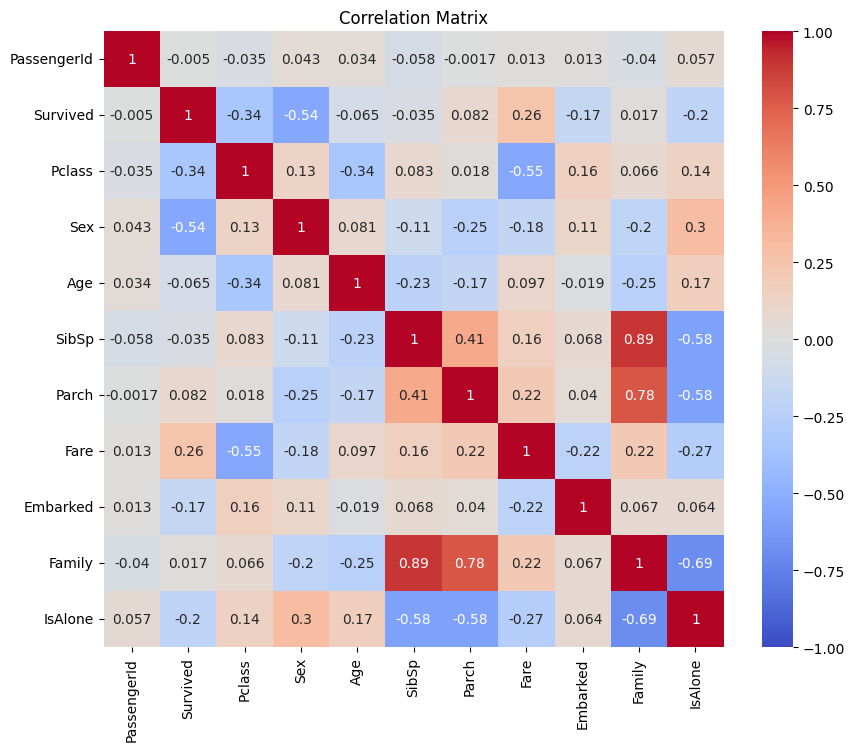

In [36]:
import seaborn as sns
numeric_df = train_df.select_dtypes(include = [float, int])
plt.figure(figsize = (10, 8))
sns.heatmap(numeric_df.corr(), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

# Distribution of survivors by ticket price

<ipython-input-38-27caf44830e3>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_grouped = train_df.groupby('Fare_Category')['Survived'].agg(['count', 'sum']).reset_index()


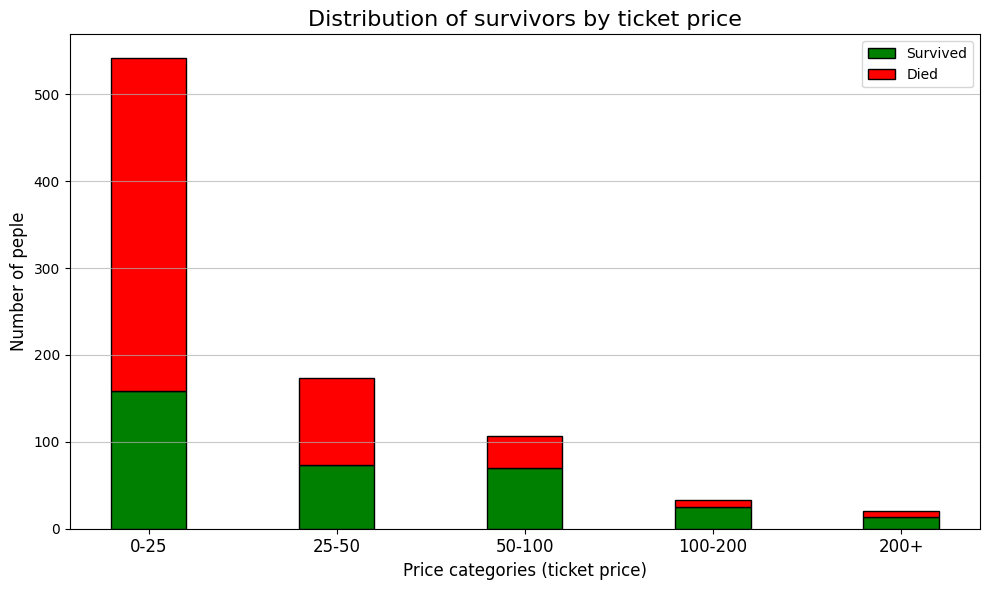

In [38]:
fare_bins = [0, 25, 50, 100, 200, 600]  # Price categories
fare_labels = ['0-25', '25-50', '50-100', '100-200', '200+']
train_df['Fare_Category'] = pd.cut(train_df['Fare'], bins=fare_bins, labels=fare_labels)

# Group data by cost categories
fare_grouped = train_df.groupby('Fare_Category')['Survived'].agg(['count', 'sum']).reset_index()
fare_grouped.rename(columns={'count': 'Total', 'sum': 'Survived'}, inplace=True)
fare_grouped['Died'] = fare_grouped['Total'] - fare_grouped['Survived']


fig, ax = plt.subplots(figsize=(10, 6))

categories = fare_grouped['Fare_Category']
x = range(len(categories))
width = 0.4

ax.bar(x, fare_grouped['Survived'], width, label='Survived', color='green', edgecolor='black')
ax.bar(x, fare_grouped['Died'], width, label='Died', color='red', edgecolor='black', bottom=fare_grouped['Survived'])

ax.set_title('Distribution of survivors by ticket price', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.set_xlabel('Price categories (ticket price)', fontsize=12)
ax.set_ylabel('Number of peple', fontsize=12)
ax.legend()
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

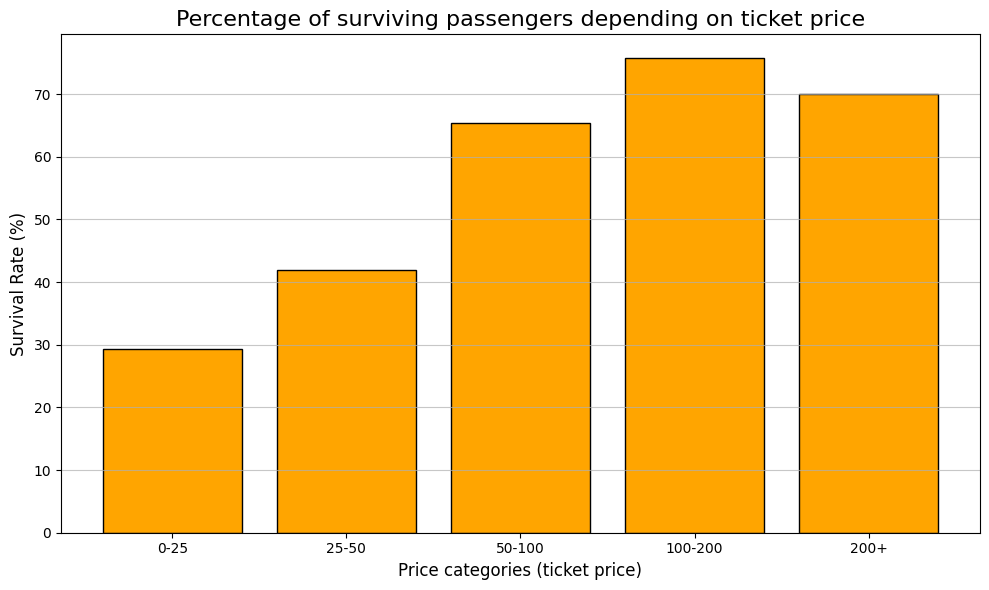

In [42]:
fare_grouped['Survival Rate (%)'] = (fare_grouped['Survived'] / fare_grouped['Total']) * 100

plt.figure(figsize=(10, 6))
plt.bar(fare_grouped['Fare_Category'], fare_grouped['Survival Rate (%)'], color='orange', edgecolor='black')
plt.title('Percentage of surviving passengers depending on ticket price', fontsize=16)
plt.xlabel('Price categories (ticket price)', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

In [43]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,IsAlone,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1,0,0-25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,50-100
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,1,0-25
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,1,0,50-100
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0,1,0-25


# Conclusion on exploratory data analysis

So, in the training dataset we have 891 rows, in the test dataset 418 rows.
Some data was missing in the datasets, which I replaced with median values.
After analyzing the data, I found out:

1.   Only 18.9% of men survived, and 74.2% of women survived
2.   Cabin class affects the probability of survival, because 63% of those who survived in first class survived, and 24.2% in third class
3. The most survivors were people aged 0-5 years and 20-40 years
4. The percentage of survivors of people without relatives is 30%, and those who have from 1 to 3 relatives have a survival percentage of 50% +
5. The column "Survived " correlates with the columns "Pclass", "Sex", "Fare", "Family" and "IsAlone"
6. The cost of the ticket greatly affects the probability of survival, because as the price of the ticket increases, the probability of survival increases